### Idea 
#### search for songs that contain the name of the 5 biggest cities in each state
- Get the list of the 5 biggest cities from each state (wikipedia)
- search for occurences of the city name in the lyrics of songs (lyrics.com)
- clean up the table

In [36]:
from requests import get
import glob
import pandas as pd
from bs4 import BeautifulSoup
import re
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from time import sleep
from random import randint

In [37]:
response = get("https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population")
html_soup = BeautifulSoup(response.text, 'html.parser')
states = html_soup.find_all("tr")

In [38]:
names_states =[]
names_cities =[]

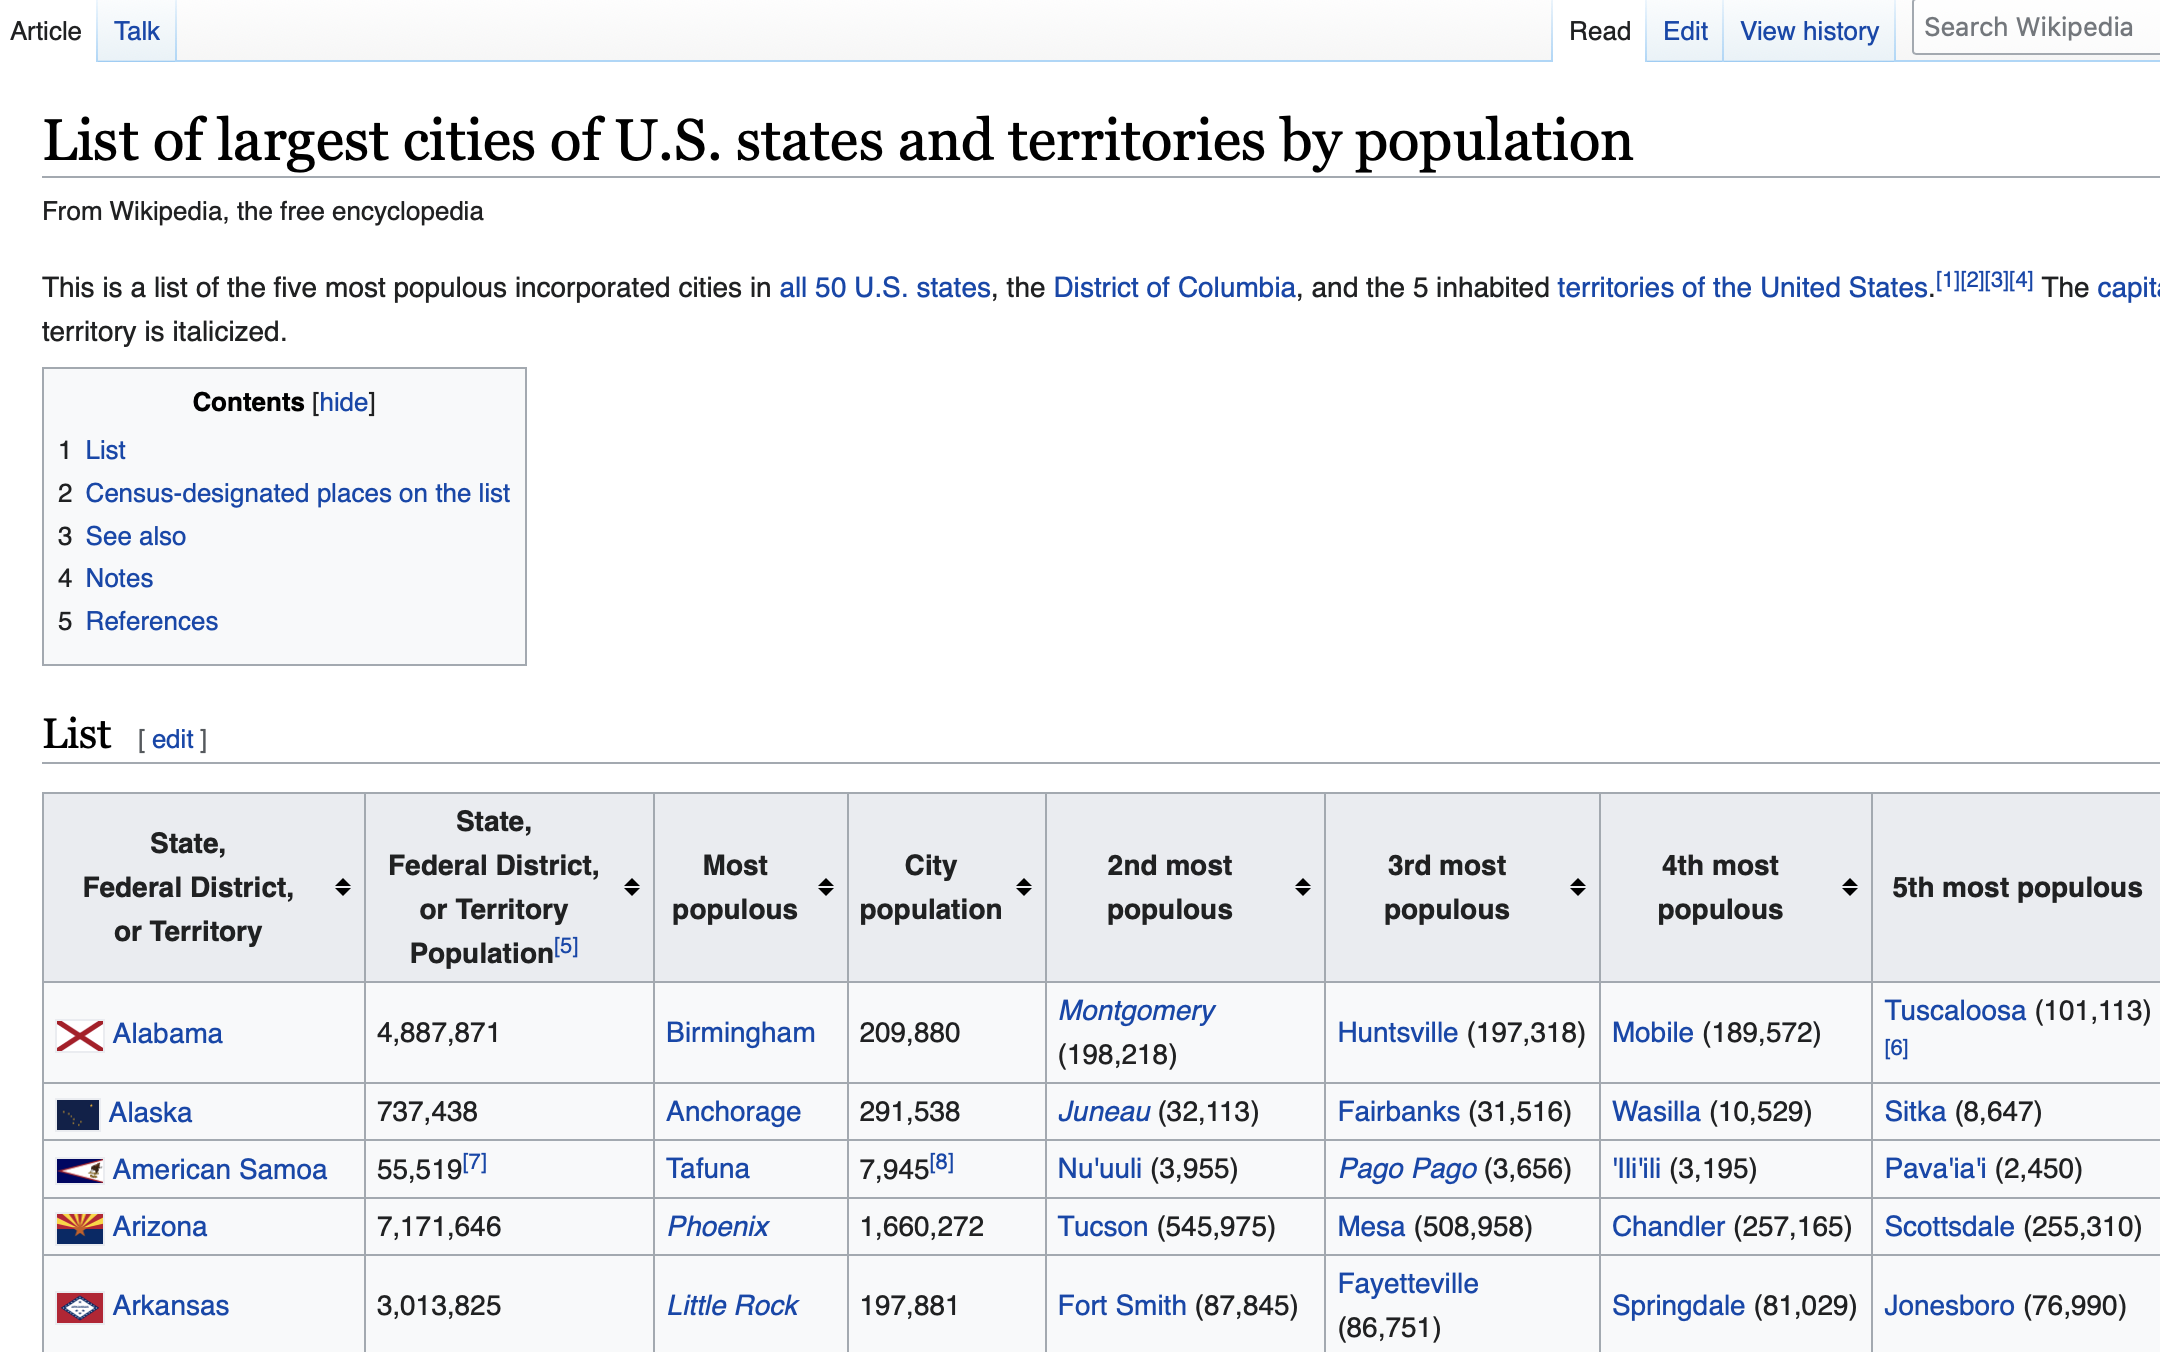

In [39]:
for state in states[1:57]:
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[0].text.strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[2].text.strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[4].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[5].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[6].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[7].text.split("(")[0].strip())
    
    if len(state.find_all("td")[-1])>=3:
        names_states.append(state.find_all("td")[0].text.strip())
        names_cities.append(state.find_all("td")[-1].text.split("(")[0].strip())
    

In [40]:
song_city = []
song_state = []
song_name =[]
song_artist =[]
curr_state = names_states[0]

In [41]:
def song_name_scraper(city,state):
    response = get("https://www.lyrics.com/lyrics/"+city)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    if len(html_soup.find_all("div",class_ ="pager"))>0:
        number_pages = int(html_soup.find_all("div",class_ ="pager")[-1].find_all("a")[-1].text)
    else:
        number_pages=1
    
    for page_no in range(1,number_pages+1):
        response = get("https://www.lyrics.com/lyrics/"+city+"&p="+str(page_no))
        html_soup = BeautifulSoup(response.text, 'html.parser')
        page = html_soup.find_all("div",class_ ="lyric-meta within-lyrics")
        for entry in page:
            print(city,page_no,entry.find_all("p")[0].text)
            song_city.append(city)
            song_state.append(state)
            song_name.append(entry.find_all("p")[0].text)
            song_artist.append(entry.find_all("p")[1].text)

        sleep(randint(1,2))

In [ ]:
for count,city in enumerate(names_cities[204:]):
    state = names_states[count+204]
    if state!=curr_state:
        data = pd.DataFrame({"city":song_city,
              "state":song_state,
             "artist":song_artist,
              "song":song_name
             })
        data.drop_duplicates()
        data.to_csv("./songs_lyrics/"+str(curr_state)+".csv")
        curr_state = state
        song_city = []
        song_state = []
        song_name =[]
        song_artist =[]

    
    song_name_scraper(city,state)


New York 1 Streets of New York (City Life) [[Remix]]
New York 1 Where It Started At (NY)
New York 1 Streets of New York (City Life)
New York 1 New York
New York 1 New York
New York 1 New York Is Rockin'
New York 1 Rock City
New York 1 New York [Remix]
New York 1 New York!!
New York 1 New York City
New York 1 New York Shit
New York 1 Come Get everything
New York 1 I Love New York/New York, New York
New York 1 New York
New York 1 Pop Muzik [Pop Mart Mix]
New York 1 Welcome To New York
New York 1 Stress Ya
New York 1 New York Times
New York 1 Streets of New York (City Life) [DVD]
New York 1 Safe in New York City
New York 1 All the Critics Love U in New York
New York 1 All the Critics Love U in New York
New York 1 New York City
New York 1 Big City of Dreams
New York 2 New York, New York
New York 2 New York Medley: New York, New York/New York, New York
New York 2 Stress Ya
New York 2 New York Medley: New York, New York/New York, New York
New York 2 New York Medley: New York, New York/New Yo

New York 12 I Happen to Like New York
New York 12 New York Fever
New York 12 Sunday in New York
New York 12 Another Lonely Night in New York
New York 12 2 Your Streets
New York 12 New York State Of Mind
New York 12 NYC Beat
New York 12 NYC Beat
New York 12 NYC Beat
New York 12 La Nuova Stella di Broadway
New York 12 Open Letter to NYC [Acappella]
New York 12 A Star Is Born
New York 12 A Star Is Born
New York 12 New York State Of Mind
New York 12 New York State of Mind
New York 12 New York City
New York 12 No. New York
New York 12 纽约纽约
New York 12 Jamaican in New York
New York 12 New York, New York
New York 12 New York, New York
New York 12 New York, New York
New York 12 New York New York
New York 12 El Que No Salta Es Paco
New York 13 뉴욕 New York
New York 13 Down and Out in New York City
New York 13 The New Face of Zero and One
New York 13 New York, New York, New York
New York 13 Englishman In New-York
New York 13 No. New York
New York 13 Cocaine in My Brain
New York 13 A Heart in New 

New York 24 King Of New York
New York 24 New York State of Mind
New York 24 King of NY
New York 24 On the Sidewalks of New York
New York 24 Strong Enough
New York 24 King of N.Y.
New York 24 Wake Up
New York 24 The Boy from New York City
New York 24 NYC (There's No Need to Stop)
New York 24 New York Morning
New York 24 Mi Novia
New York 24 An Englishman In New York
New York 24 Un Fait Diver et Rien de Plus
New York 24 New York, Rio, Rosenheim
New York 24 Englishman In New York
New York 24 New York State of Mind
New York 24 The City
New York 24 Too Dumb for New York City
New York 24 Gotta Be There
New York 24 This Land Is Your Land
New York 24 90 's Flow
New York 24 Wake Up
New York 24 She Don't Really Care/1 Luv
New York 24 New New York
New York 25 Native New Yorker
New York 25 NYC
New York 25 New York Raining
New York 25 Arthur's Theme (Best That You Can Do)
New York 25 New York State Of Mind
New York 25 Daddy Don't Live in That New York City No More
New York 25 Money [Previously Unre

New York 35 Arthur's Theme (Best That You Can Do)
New York 35 Arthur's Theme (Best That You Can Do)
New York 35 Arthur's Theme
New York 35 Arthur's Theme
New York 35 R.I.P. Barneys
New York 35 If Heaven Ain't a Lot Like Dixie
New York 35 If I Ever Get Back to Georgia
New York 35 Stayin' Alive
New York 35 Got A Little Country
New York 35 Money Over Bitches
New York 35 She Sets The City On Fire
New York 35 New York Broken Toy
New York 35 December In New York
New York 35 Cathedrals
New York 35 Build Me a Girl
New York 35 Respiration
New York 35 Good Hit
New York 35 Thug Style
New York 35 Thug Style
New York 35 Love It or Leave It Alone/Welcome to Jamrock
New York 35 1970 Somethin'
New York 35 Chill
New York 35 On the Floor
New York 35 Big Noise, New York
New York 36 Air Algiers
New York 36 Real Women
New York 36 SWIZZMONTANA
New York 36 Up
New York 36 New York [DVD]
New York 36 Rock & Roll
New York 36 Rock & Roll
New York 36 Rock & Roll
New York 36 NY2LA
New York 36 In a New York Second
N

New York 47 Toy Soldier
New York 47 NYC's Like a Graveyard
New York 47 Winter in New York
New York 47 New York
New York 47 Keep It Low
New York 47 Slow-Mo In New York
New York 47 冷たいミルク
New York 47 トゥナイト
New York 47 Lady Close
New York 47 Black Jesus + Amen Fashion
New York 47 Levon
New York 47 Award Tour
New York 47 Darling Lorraine
New York 47 Realest N*ggas
New York 47 All in the Name of Rock 'n' Roll
New York 47 Award Tour
New York 47 She Let Herself Go
New York 47 All in the Name of Rock 'N' Roll [Alternate Version; Previously Unreleased Track; Bonus Track]
New York 47 Award Tour
New York 47 Change Clothes
New York 47 Change Clothes
New York 47 Brooklyn's Finest
New York 47 Lonely Town
New York 47 Lonely Town
New York 48 Around the World
New York 48 Hard Knocks
New York 48 The Right Profile
New York 48 Orange Blossom Special
New York 48 New York City Blues
New York 48 This Land Is Your Land
New York 48 Orange Blossom Special
New York 48 Orange Blossom Special
New York 48 Glad Tidi

New York 59 Last Exit to Brooklyn [Vocal Version]
New York 59 Make a Move
New York 59 Country Girl, City Man (Just Across the Line)
New York 59 Sidewalks of New York
New York 59 Mister Can You Spare a Dime
New York 59 Welcome2MyWorld
New York 59 My God
New York 59 Darlington County
New York 59 It's a Great Day for the Irish
New York 59 Vaca Profana
New York 59 Bright Lights [Bonus Track]
New York 59 When You Got Good Friends
New York 59 The Hollywood Dream
New York 59 Orange Blossom Special
New York 59 Westside Story
New York 59 On the Floor (Ven a Bailar) [Spanish Version]
New York 59 Westside Story
New York 59 The Crown
New York 59 This Land Is Your Land
New York 59 This Land Is Your Land
New York 59 Pest Control
New York 59 Breaking My Wrist
New York 59 LA Who Am I To Love You
New York 59 North American Scum [Onanistic Dub]
New York 60 New York Ripper
New York 60 Turn This Mutha Out
New York 60 My Secret Place
New York 60 Let's Fly Away
New York 60 It's a Great Day for the Irish
New

New York 71 Strangers
New York 71 Chuck Person
New York 71 Sunset Blow
New York 71 Bury Me Dead
New York 71 Homegrown Honey
New York 71 Everyday (Amor)
New York 71 We Be Burnin' (Recognize It)
New York 71 August & Everything After
New York 71 Crisis
New York 71 GIGI (SKITTLEZ)
New York 71 Get Low [Remix]
New York 71 Je suis africain
New York 71 Vaca Profana [Ao Vivo]
New York 71 Je suis africain
New York 71 Five Guys
New York 71 Going Back to Georgia
New York 71 Snakes
New York 71 Gimme Your Money Please
New York 71 The Geographic North Pole
New York 71 Sheena Is a Punk Rocker [Single Version]
New York 71 Piss Factory
New York 71 Copa (Cabanga)
New York 71 On the Road Again
New York 71 Orange Blossom Special
New York 72 Speak Ya Clout
New York 72 On That Day
New York 72 Cradle and All
New York 72 Ragtime
New York 72 Closing Down the Park
New York 72 Moments of Pleasure [Album Version]
New York 72 So Happy [Bonus Track]
New York 72 Speak Ya Clout
New York 72 Jettin'
New York 72 Alice
Ne

New York 83 Token of My Affection
New York 83 Teufel im Blut
New York 83 Terminal Romance
New York 83 Schönste Zeit
New York 83 Tito's Back
New York 83 Sale
New York 83 Burn Out in Vegas
New York 83 No Heroes
New York 83 Everybody wants to leave
New York 83 New York
New York 83 When She Dances (Wenn sie tanzt) [Aus "Sing meinen Song, Vol. 7"]
New York 83 Wenn sie tanzt [Akustik Version]
New York 83 I Love New York
New York 83 Africa
New York 83 ABC's of New York
New York 83 New York me manque
New York 83 Amore Digitale
New York 83 Tony Yayo Explosion
New York 83 Because I Got It Like That
New York 83 Grown Man Business (Fresh Vintage Bottles)
New York 83 Because I Got It Like That
New York 83 Because I Got It Like That
New York 83 You Surround Me
New York 83 So Brooklyn
New York 84 I Come Prepared
New York 84 I Come Prepared
New York 84 2012 (It Ain't the End)
New York 84 Tonight
New York 84 L.A. River
New York 84 Oh What a World [Best Of Version]
New York 84 Happy If You're Happy
New 

New York 95 Waves of Love
New York 95 Another Night
New York 95 Der goldene Tisch
New York 95 Bug (S)
New York 95 Down on the Farm
New York 95 It's a Texas Christmas
New York 95 Globetrotter
New York 95 All the Time
New York 95 New York
New York 95 Ecker's Last Stand
New York 95 YAS
New York 95 Stoned on the One
New York 95 Girl from New York
New York 95 Fresh out of Air
New York 95 The Hammer and the Nail
New York 95 Hjardemål klit
New York 95 Christmas in New York
New York 95 911 [Remix]
New York 95 No Remedy
New York 95 R&R Air Mail
New York 95 Equalizer [Demo]
New York 95 I Like Me Better [(TRU Concept Remix)]
New York 95 Anh Không Phải Hotboy
New York 95 Out The Window
New York 96 I Like Me Better [(Cheat Codes Remix)]
New York 96 Sundays in New York
New York 96 Posmo
New York 96 I.G.Y. (What a Beautiful World)
New York 96 Baby Please
New York 96 Daddy Jinx
New York 96 Rebound
New York 96 Hood to Hood
New York 96 Glitter in a Void (Single Version)
New York 96 The Likes of You
New 

New York 107 Get Up Offa That Thing (Release the Pressure)
New York 107 Dancing In The Street
New York 107 Dancing In The Street
New York 107 Rup Rup (Bad Inna Real Life)
New York 107 Rap Millionaire
New York 107 Poke It Out
New York 107 Now's the Time
New York 107 Intro
New York 107 Murdergram
New York 107 How About You?
New York 107 How About You?
New York 107 Save the Life of My Child
New York 107 One More Town
New York 107 Jeru
New York 107 How About You?
New York 107 How About You?
New York 107 Jeru
New York 107 Then, Now and Until the End
New York 107 Scenario
New York 107 8 Million Stories
New York 107 Trudy
New York 107 Voodoo Chile
New York 107 Psycho Daisies
New York 107 Trudy
New York 108 How About You?
New York 108 One More Chance
New York 108 Talk to Me Fiddle
New York 108 Scenario
New York 108 Elected
New York 108 Jeru
New York 108 How About You?
New York 108 Jeru
New York 108 Elected
New York 108 Voodoo Chile
New York 108 Holy Ground
New York 108 How About You
New York 1

New York 120 Pass That Dutch
New York 120 Thumbin' a Ride
New York 120 Texas (When I Die)
New York 120 Empire State Express
New York 120 Twistin' the Night Away
New York 120 It's Tricky
New York 120 Airmail Special
New York 120 Twisting the Night Away
New York 120 Devil in a Sleeping Bag
New York 120 Tennessee Homesick Blues
New York 120 Electric Relaxation
New York 120 Steve Biko (Stir It Up)
New York 120 4th of July, Asbury Park (Sandy)
New York 120 Chocolate City
New York 120 Just Like Tom Thumb's Blues
New York 120 Katmandu
New York 120 Homecoming
New York 120 C.R.E.A.M.
New York 120 The Boxer
New York 120 The Boxer
New York 120 It's Tricky
New York 120 Back in the U.S.A.
New York 120 Back in the U.S.A.
New York 120 Havana Moon
New York 121 Twistin' the Night Away
New York 121 When the Whip Comes Down
New York 121 One
New York 121 Coming of Age
New York 121 Undercover of the Night
New York 121 East St. Louis Blues (Fare Thee Well)
New York 121 Silver and Gold [Live]
New York 121 An

New York 132 Wish You Would
New York 132 The Crackhouse
New York 132 Pregnant
New York 132 Pregnant
New York 132 Marry the Night
New York 132 Dope Boys
New York 132 Wish You Would
New York 132 Pregnant
New York 132 Edge of a Revolution
New York 132 Anytime
New York 132 Just Another Day
New York 132 Fruitcakes
New York 132 Wish You Would
New York 132 Everybody Rise Again
New York 132 Roots
New York 132 Mourn You Til I Join You [Radio Edit]
New York 132 Man Down
New York 132 The Tenth World
New York 132 Silly Watch
New York 132 Original Lyrics
New York 132 A Life in the Day of Benjamin André (Incomplete)
New York 132 Control
New York 132 The Autograph
New York 132 Don't Stop
New York 133 I Come Off
New York 133 Fancy Passes
New York 133 Can't Get Any Harder
New York 133 Boss
New York 133 Cuttin off Fingaz
New York 133 Boss
New York 133 Remedy
New York 133 In Da Club
New York 133 21 Questions
New York 133 Ultraviolence
New York 133 We Ride
New York 133 Dollar Bill
New York 133 Someone
New

New York 144 Dancing In The Street
New York 144 Dancing In The Street
New York 144 Dancing In The Street
New York 144 Dancing In The Street
New York 144 Part Time Suckers
New York 144 Some People [Demo]
New York 144 The Apprentice
New York 144 Pop Muzik
New York 144 Profit
New York 144 Judgement Day
New York 144 I'm More Than Satisfied
New York 144 The G.O.D.
New York 144 Judgement Day
New York 144 One's on the Way
New York 144 Fire
New York 144 Dancing in the Street
New York 144 Christian Dior Denim Flow
New York 144 Duck
New York 144 One's on the Way
New York 144 Fire
New York 144 Doin It Well
New York 144 Watcha Gon' Do?
New York 144 Superfly
New York 144 Take It There
New York 145 Jugni Ji
New York 145 Dirty AF1s
New York 145 Balladen Om Gustaf Blom
New York 145 'Bout Ya'll
New York 145 Yoü And I
New York 145 Drumshanbo Hustle
New York 145 My Heat Goes Boom
New York 145 One World
New York 145 First Class Private Mary Brown
New York 145 Honky Tonk Women
New York 145 Country Grammar 

New York 156 Un-Hunh!
New York 156 Un-Hunh!
New York 156 Hot, Hot, Hot
New York 156 Phony Rappers
New York 156 Mason Dixie Lines
New York 156 Relax Your Mind
New York 156 Dear John Letter
New York 156 You Ain't No Gangsta
New York 156 Power of the Dollar
New York 156 I'm a Hustler
New York 156 Beware [Jay-Z Remix]
New York 156 Beware [Jay-Z Remix]
New York 156 Tear Me Down
New York 156 911
New York 156 Wake Up
New York 156 It's Real
New York 156 Thugman
New York 156 Tell 'Em
New York 156 Angels Around Me
New York 156 Ladies Night
New York 156 One Way or Another
New York 156 Nowhere to Run (Vapor Trail)
New York 156 I Wish I Made That/Swagga
New York 156 Le fils de Superman
New York 157 God Must Have Blessed America
New York 157 Country Girl
New York 157 Honky Tonk Women [Previously Unreleased Track]
New York 157 Cowboy Beat
New York 157 Thou Shalt Not
New York 157 G Style
New York 157 Ain't No Stoppin' This
New York 157 Farther I Go
New York 157 Train Kept A Rollin' [Bonus Track]
New Y

New York 169 Maria
New York 169 Big Up
New York 169 Take It in Blood
New York 169 How Hard Is It?
New York 169 Is Your God a Dog
New York 169 Is Your God a Dog
New York 169 How About You
New York 169 Symphony 2000
New York 169 Put Some Money on It
New York 169 Troublemakers
New York 169 Mastermind
New York 169 Marriage Made in Hollywood
New York 169 How About You
New York 169 Rock da Spot
New York 169 So Many Girls
New York 169 Problem
New York 169 Golden Salvation (Jesus Piece)
New York 169 Outlaw State of Mind
New York 169 I'm Dope Nigga
New York 169 Blue Ridge Mtns. (Smoky Version) [Sky Blue Version]
New York 169 Fancy
New York 169 I Feel Lucky
New York 169 I'm More Than Satisfied
New York 169 This'll Be My Year
New York 170 The New World
New York 170 Millbrook
New York 170 Playaz Club
New York 170 The Wisdom of Snow
New York 170 Old Thing Back [Matoma Remix]
New York 170 It's Okay (One Blood)
New York 170 Get Up Offa That Thing
New York 170 Bosses Speak
New York 170 The Sauce
New Y

New York 181 Transit Ride
New York 181 Face the Face
New York 181 Killa Hill Niggas
New York 181 You Got Me
New York 181 Symphony
New York 181 Wear Out the Turnpike
New York 181 Show Me What You Got
New York 181 Trying to Get Away
New York 181 This Mess We're In
New York 181 Collaboration '98
New York 181 A Little Bit Independent
New York 181 Raw Deal
New York 181 Baby Come Home
New York 181 En la Fiesta Mando Yo
New York 181 Hard Candy
New York 181 Bossman
New York 181 It Ain't Safe No More
New York 181 What Up
New York 181 Hey Ladies
New York 181 It Ain't Safe No More...
New York 181 Pussy Killz
New York 181 Goodbye Pork Pie Hat
New York 181 Y.O.U.
New York 181 Sandy (4th July, Asbury Park)
New York 182 It Ain't Safe No More
New York 182 My Long Skinny Lanky Sarah Jane
New York 182 You Got Me [Live]
New York 182 The Turn
New York 182 Twelve Thirty (Young Girls Are Coming to the Canyon)
New York 182 Real Nigga Roll Call
New York 182 Grand Finale
New York 182 Earthquake Driver
New York

New York 193 Air Mail Special [Cdb Remix]
New York 193 Outlaw
New York 193 Going Diamond
New York 193 Get Dis Money
New York 193 Yoü and I
New York 193 Sunset
New York 193 Going Diamond
New York 193 Yoü And I
New York 193 Yoü And I
New York 193 Yoü And I
New York 193 Yoü And I
New York 193 Yoü And I
New York 193 2 Reasons
New York 193 Honky Tonk Women
New York 193 First Date
New York 193 2 Reasons
New York 193 Top of the World
New York 193 Kiss Your Ass Goodbye [Remix]
New York 193 She's Every Woman
New York 193 Shake That
New York 193 Postcards from Paris
New York 193 Dope Fiend Beat
New York 193 Shake It
New York 193 Spotlight
New York 194 It's Tricky
New York 194 Lit
New York 194 I Want It All
New York 194 4th of July, Asbury Park (Sandy)
New York 194 Freedom
New York 194 Pull Up
New York 194 Si Tu Novio Te Deja Sola
New York 194 What You Like
New York 194 That's It
New York 194 A$AP Forever
New York 194 The Boxer
New York 194 You Need Me
New York 194 This Land Is Your Land
New York

New York 206 Toe Jam
New York 206 Toe Jam
New York 206 The Bay Bridge Club
New York 206 Certified Gangsta
New York 206 Moana
New York 206 Queensfinest
New York 206 Pimp of the Nation
New York 206 Da Bridge 2001
New York 206 Our Way
New York 206 Teenage Thug
New York 206 Famous Blue Raincoat
New York 206 What Would I Do
New York 206 Cherie
New York 206 Work (Remix)
New York 206 Freestyle Doo Wop Summer Jam 96
New York 206 Mrs All American
New York 206 God It
New York 206 61 Highway
New York 206 Get Outta Town
New York 206 Girl on Fire
New York 206 Bad to Be Good
New York 206 Give Up the Goods (Just Step)
New York 206 Da Bridge 2001
New York 206 Nobody Told Me
New York 207 Coast 2 Coast
New York 207 City of Silver Dreams
New York 207 The Things That Dreams Are Made of
New York 207 The Show Goes On
New York 207 29
New York 207 Gotta Let Your Nuts Hang
New York 207 I've Got A One Way Ticket To You
New York 207 Finger
New York 207 Bright Lights
New York 207 Nigo Hilfiger
New York 207 3 Pill

New York 218 Trains
New York 218 R.A.K.I.M.
New York 218 Art Star
New York 218 Deadly Habitz
New York 218 Rawkfist
New York 218 Piece of the Road
New York 218 Wabash Cannonball
New York 218 This Land Is Your Land
New York 218 Famous Blue Raincoat
New York 218 Honky Tonk Woman
New York 218 Refuge
New York 218 Down in Tennessee
New York 218 New York Girls
New York 218 One World
New York 218 Rap de Rap Show
New York 218 Cryin' Shame
New York 218 Between the Road Signs
New York 218 Rock & Roll Weekend
New York 218 The Irish Rover
New York 218 Sutter's Mill
New York 218 NY Prophesie
New York 218 Here's Looking at You
New York 218 Bond
New York 218 Top Cat
New York 219 Yesterday Is Here
New York 219 Pass the Gat
New York 219 The Travel Jam
New York 219 Steady Bootleggin'
New York 219 When It All Began
New York 219 Mr. Tanner
New York 219 Rump Shaker
New York 219 One Step Ahead of the Blues
New York 219 You're All the World to Me
New York 219 Hold On
New York 219 3 Forties & A Bottle of Moet


New York 231 The Enemy
New York 231 Double Up
New York 231 Double Up
New York 231 Nights (Feel Like Getting Down)
New York 231 Yesterday Is Here
New York 231 Texas Swing
New York 231 Fallin'
New York 231 Rainmaster
New York 231 Mack Trucks
New York 231 Yes Yes Y'all
New York 231 Girls in Jail
New York 231 Freaks
New York 231 Get Smart
New York 231 Get Smart
New York 231 We Know
New York 231 It Ain't Nothin' Wrong With You
New York 231 Brighter Day
New York 231 More Prophet
New York 231 Good Night, New York [Previously Unreleased Track]
New York 231 Prove Something
New York 231 Country Cabin Itis
New York 231 American as Apple Pie
New York 231 Losing My Edge
New York 231 Baby U Got
New York 232 Platforms
New York 232 The Body of an American
New York 232 Travelin' Man
New York 232 I Told You
New York 232 Kung Fu
New York 232 Boogie Man
New York 232 Citizen Ship
New York 232 Daybreak
New York 232 The Show Must Go On
New York 232 This Land Is Your Land
New York 232 R.A.M.O.N.E.S.
New York 

New York 243 Blackstreet (On the Radio)
New York 243 Apollo XI
New York 243 Keep Playin' That Rock & Roll
New York 243 Monkey Business
New York 243 Amity
New York 243 What Do I Care
New York 243 Do It, See It, Be It
New York 243 Deee-Lite Theme
New York 243 Pandora's Box
New York 243 No Diggity [Das Diggity Radio]
New York 243 Back in the USA
New York 243 It Was Written (Ft. Stephen Marley, Capleton & Drag-On)
New York 243 One Day
New York 243 Pandora's Box
New York 243 The Voyager
New York 243 Ridin' Dirty
New York 243 Ridin' Dirty
New York 243 Los Angeles
New York 243 Ride Your Pony
New York 243 The Movement
New York 243 Get on Up
New York 243 Manhattan Bridge Serenade
New York 243 A Casa Mia
New York 243 The Morning After
New York 244 Satellite Blues
New York 244 Occasion Avenue
New York 244 The Science
New York 244 The Sound of the Life of the Mind
New York 244 Shoot You Down
New York 244 Wood & Leather
New York 244 Headphones
New York 244 1 Hell of a Life
New York 244 Alabaster
Ne

New York 255 Love My Hood
New York 255 Peace Sign/Index Down
New York 255 Home
New York 255 Peace Sign/Index Down
New York 255 Home
New York 255 I'm Thuggin
New York 255 Ghetto
New York 255 A Gangster and a Gentleman
New York 255 You Don't Know Me
New York 255 Love This Town
New York 255 Push It Along
New York 255 I Like That
New York 255 Riptide
New York 255 Buck Jump Time
New York 255 If You So Gangsta
New York 255 50 States Of America
New York 255 Back Again
New York 255 My Apartment
New York 255 Ain't No Click
New York 255 Are You Ready
New York 255 Suicide
New York 255 Take It to the Streets
New York 255 Wimmie Nah
New York 255 Headphones
New York 256 Dayum!
New York 256 How About You
New York 256 We Like to Party
New York 256 Paris
New York 256 36" Chain [BSBD Remix]
New York 256 Everything 4 Sale
New York 256 Reload
New York 256 Ghost Says
New York 256 Hit the Block
New York 256 Basic Cable
New York 256 Secrets in the Street
New York 256 This Is How It Sounds
New York 256 No Esc

New York 267 Hoop N Yo Face
New York 267 Good to Be on the Road Back Home
New York 267 Blood Brothers
New York 267 Outside World
New York 267 Underground Town
New York 267 Saving the Best for Last
New York 267 Thug Brothers
New York 267 Singer in the Band
New York 267 Philly
New York 267 Think Locally Fuck Globally
New York 267 Standing in My Light
New York 267 I've Grown Accustomed to Her Face
New York 267 Hey Eugene
New York 267 We Know
New York 267 Checkin' on Me
New York 267 Salvami
New York 267 Country Girls
New York 267 Big Shot
New York 267 Colors
New York 267 Smarter Than U
New York 267 Love Epidemic
New York 267 Hold It Down
New York 267 A  Brighter Day
New York 267 We in Here
New York 268 Normal Em Curitiba
New York 268 Don't Even Trip
New York 268 Like Wow-Wipeout!
New York 268 Anywhere But Here
New York 268 Reeperbahn 2011 (What It's Like)
New York 268 Judy Teen
New York 268 Death Comes Callin'
New York 268 The Ghetto
New York 268 I Feel For You
New York 268 Fast Train
New 

New York 279 Narcos
New York 279 You Don't Want Drama
New York 279 You Don't Want Drama
New York 279 These Times Are Changing
New York 279 Ooo
New York 279 Light Up Ya Lighter
New York 279 Savior
New York 279 Couldn't Get It Right
New York 279 Couldn't Get It Right
New York 279 Die Hard / Working Girl Musical Medley
New York 279 I'll Keep Ramblin'
New York 279 Da' Butt
New York 279 Take a Look (At Yourself)
New York 279 Lean Back
New York 279 America
New York 279 Doing the Slop
New York 279 Couldn't Get It Right
New York 279 Chipi-Chipi
New York 279 Da' Butt
New York 279 Grow Into A Ghost
New York 279 South
New York 279 Winter Sun
New York 279 Texas Kind Of Way
New York 279 G-Dep
New York 280 Lamb Turned Lion
New York 280 Mi Primer Millon
New York 280 Sit Here
New York 280 How About You
New York 280 Ghetto Pop Life II
New York 280 Whoa!
New York 280 How About You
New York 280 Dope House Family
New York 280 When You Gonna Drop
New York 280 That Oprah
New York 280 Wipe Me Down
New York 2

New York 291 Oh My God
New York 291 I Like That
New York 291 How Deep is Your Love
New York 291 That's Hard
New York 291 Set Up Shop
New York 291 Don't Miss Your Life
New York 291 Where You Lead
New York 291 No Diggity [Das Diggity Radio]
New York 291 We Fly High [Remix]
New York 291 Work [Remix]
New York 291 I Choose U
New York 291 Back Up
New York 291 Tú No Vive Así
New York 291 But I'm Bulletproof
New York 291 Riptide [Riptide (FlicFlac Edit)]
New York 291 Bali
New York 291 Beloved
New York 291 TERMINATOR
New York 291 Dispatch
New York 291 Overseas
New York 291 Carry The Tradition
New York 291 Playin Wit A Chek
New York 291 We Got Everything
New York 291 Whiskey & Patron
New York 292 LES ENFANTS PALES
New York 292 You Ain't Big
New York 292 State of Emergency
New York 292 Ohhwee
New York 292 Parking Lot Pimpin'
New York 292 Blackout
New York 292 A New Kind of Water
New York 292 Absolute Beginners Again
New York 292 On Earth
New York 292 No Names
New York 292 Kay
New York 292 #1 Soul

New York 304 Make That Scene
New York 304 Ka-Ching
New York 304 Where I Wanna Be
New York 304 You Can't Kill Me
New York 304 Front On This
New York 304 Party Ain't a Party
New York 304 Do It
New York 304 Mundian to Bach Ke
New York 304 God bless the U.S.A.
New York 304 Vinyl Records
New York 304 Where I Wanna Be
New York 304 Wabash Cannonball
New York 304 Miss America
New York 304 What a Mess
New York 304 Coast to Coast Gangstas
New York 304 Shotgun Fire
New York 304 Champion Sound
New York 304 Drunken Styles
New York 304 No Sellout
New York 304 I Honor U
New York 304 Buckingham Palace
New York 304 Angela Baker and My Obsession with Fire
New York 304 Playboy 2
New York 304 Con un Deca
New York 305 I'm on My Way
New York 305 Where I'm From
New York 305 Corner Bar
New York 305 Ghost Town
New York 305 How Deep Is Your Man?
New York 305 Light Shit Up
New York 305 One Way or Another
New York 305 Kill the Dance (Got Something for Ya)
New York 305 Playboy 2
New York 305 Hey You
New York 305 F

New York 317 J'aurais Essayé
New York 317 Same Time
New York 317 Heimweh
New York 317 Tamdilidididam
New York 317 By the Way / Les fleurs lunaires
New York 317 She's Not Mine
New York 317 It's Good to Be Home
New York 317 THE Boxer
New York 317 Sugar Smacks
New York 317 Sie können alles
New York 317 Remember
New York 317 New York
New York 317 Coming to Get You
New York 317 Woman
New York 317 You Must Believe in Light
New York 317 Ferguson (Too Many)
New York 317 Macchu Picchu en Berlin
New York 317 Revenge
New York 317 Yet to Be
New York 317 track_3
New York 317 Vida
New York 317 Marilyn (feat. Johann Beach)
New York 317 Doğalken Daha Güzeldin
New York 317 Sailboat
New York 318 Safını Seç
New York 318 Undercover of the Night
New York 318 Chuck, Un Tipo Cornudo
New York 318 Electric Relaxation
New York 318 God Lives Through
New York 318 Steve Biko (Stir It up)
New York 318 No Way Back
New York 318 Monkey Business
New York 318 So in Love
New York 318 Opia
New York 318 Pequeña Opinión Per

New York 329 On the Regular
New York 329 Food for Thoughts
New York 329 Batterram
New York 329 Waterfront Weirdos
New York 329 Bluntz & Bakakeemis
New York 329 Goin' Down
New York 329 Up North
New York 329 Marbles
New York 329 Riding on the Back
New York 329 Dreamland
New York 329 Old Downtown
New York 329 Class War
New York 329 War
New York 329 Biggest Mistake
New York 329 A Postcard to Nina
New York 329 The Lottery
New York 329 An Animal in Your Care
New York 329 Manhattan Fault Line
New York 329 Judy Teen
New York 329 747 (Strangers in the Night) [Tommy Vance's Friday Rock Show BBC Sessio]
New York 329 I've Grown Accustomed to Her Face
New York 329 Battle Hymn of Lt. Calley
New York 329 Motorcycle Man [Live]
New York 329 747 (Strangers in the Night)
New York 330 Roadside Angel
New York 330 Flashbacks
New York 330 Orange Blossom Special [Previously Unreleased Track]
New York 330 Freedom Song
New York 330 Fresh Flesh
New York 330 Dard - E - Disco
New York 330 LA NEIGE
New York 330 Voi

New York 341 Young Adult
New York 341 Aeroporto Kennedy
New York 341 Last Time Mentioning (Good Riddance)
New York 341 Good Scare
New York 341 America (I Love America)
New York 341 Too Much Coffee
New York 341 Ma (He's Making Eyes at Me)
New York 341 Theme For The Cross
New York 341 Fairytale of New York
New York 341 Good Riddance
New York 341 Romance
New York 341 Shane
New York 341 Tu Vuò Fà l'americano
New York 341 Monopolis
New York 341 Black History
New York 341 Promises
New York 341 Back Bay Polka (But Not in Boston)
New York 341 'Bout That Time [Main]
New York 341 VSVSVS
New York 341 Too Soft
New York 341 Today
New York 341 Girls With Guitars
New York 341 Whoa!
New York 341 How About You [Duet With Sam Browne]
New York 342 Whoa
New York 342 How About You
New York 342 Whoa!
New York 342 Gun Clap Music
New York 342 Out in the World
New York 342 You Never Know
New York 342 Braid My Hair
New York 342 Lac Dogs & Hogs
New York 342 Fire Water [Bonus Track]
New York 342 Beautiful Life
Ne

New York 354 You're All the World to Me
New York 354 Horny as a Dandy [Mousse T.'s Nu Radio Mix]
New York 354 I Need a Freak
New York 354 Pretty Girls
New York 354 Fall In Love [AVenue Remix]
New York 354 Los Lujos
New York 354 Welcome to the Goondox
New York 354 Berlin Tag und Nacht
New York 354 Los Lujos Del R
New York 354 Candy Jane
New York 354 Mason-Dixon Line
New York 354 I Miss Your Face
New York 354 Let's Not Be Alone Tonight
New York 354 Pizza
New York 354 Euphoria
New York 354 Pro On the Pole [Album Version]
New York 354 Quemándose Un Gallito (El Rambo)
New York 354 Felizes (Heart To Heart)
New York 354 CIEL DE PARIS
New York 354 New York, à nos amours
New York 354 LA PAUSE
New York 354 JE NE SUIS PAS UN VIEUX SAVANT
New York 354 Me Tienen Odio
New York 354 Moskau
New York 355 All Go Go [original]
New York 355 Hot Sauce
New York 355 Sans toi
New York 355 Audi.
New York 355 Geghejazz
New York 355 Cashing Out
New York 355 Boy on a Bike
New York 355 Warlordz
New York 355 Breathe

New York 366 Midnight Girl
New York 366 Tearing Me Apart
New York 366 Spotlight On
New York 366 No Home (Steady!)
New York 366 Boomerang
New York 366 Divorce and the American South
New York 366 Smoke Dancehall
New York 366 The Woman Downstairs
New York 366 Island
New York 366 Everything
New York 366 Lonely With Me
New York 366 Serotonia
New York 366 Be Faithful
New York 366 LA VIE MODERNE
New York 366 GOLDEN BOY
New York 366 UNIVERSAL PARTY
New York 366 Le blues du businessman
New York 366 American Heartbreaker
New York 366 Young & Dumb
New York 366 It's Gonna Be Okay, Baby
New York 366 Hold Your Fire
New York 366 Don't Let It Break Your Heart
New York 366 Sally G
New York 366 La Saga
New York 367 La complainte du phoque en Alaska
New York 367 Regrets
New York 367 Jean's Been
New York 367 Amaze Me
New York 367 Six Fo
New York 367 Final Destination
New York 367 Brick City
New York 367 Roast Yourself
New York 367 Popular Americans
New York 367 Where Dem Dollas At
New York 367 Mad Dogs on

New York 378 Avec du Recul
New York 378 I Nostri Corpi Celesti
New York 378 Fairytale of New York
New York 378 La vie de rêve
New York 378 Goodnight
New York 378 Quiere Fumar [Remix]
New York 378 Everlasting
New York 378 Doscosis
New York 378 Wir bumsen deine Gang
New York 378 Break Down
New York 378 No
New York 378 Don't Talk About Me
New York 378 Big Tymin
New York 378 MESSIN'
New York 378 All These Girls
New York 378 All These Girls
New York 378 wOw
New York 378 Blackmail
New York 378 Flous Money Money
New York 378 Argo
New York 378 Enduring the Waves
New York 378 Flow Djavan
New York 378 Adrenalina
New York 378 Zelda
New York 379 Mendoza Y Ortega [Pt. 2]
New York 379 Meant to Be
New York 379 Más Más Más Más Más
New York 379 Loco Loquito
New York 379 Grimey New York (Freestyle)
New York 379 Who Run It (Freestyle)
New York 379 The Devil Went Down
New York 379 Tempo Es Tempo
New York 379 Leiser [aus "Sing meinen Song, Vol. 7"]
New York 379 EW
New York 379 Bana Gel
New York 379 Qué Ben

New York 392 Strictly Business
New York 392 No Es Una Noche Mas (Ladies Night)
New York 392 The World Turns Round
New York 392 My World
New York 392 The Dying Firefighter
New York 392 Watch Out
New York 392 Ladies Night
New York 392 Room V
New York 392 Two Zero Two
New York 392 Factory Hot Rod
New York 392 Ladies Night
New York 392 The Manual
New York 392 Outside of a Small Circle of Friends
New York 392 The Real Reality
New York 392 America Loves Gangsters
New York 392 Don't Move Away
New York 392 Wicked
New York 392 Samantha the Great
New York 392 Down on the Farm
New York 392 Spacesuit
New York 392 Ladies Night [Dance Remix]
New York 392 You Are Too Beautiful
New York 392 Man Kann Nicht Alles Haben
New York 392 Rock On
New York 393 Sombre
New York 393 Babes in the Wood
New York 393 Rugers in the Trunk
New York 393 Going Deeper
New York 393 He's Coming
New York 393 Postcard from Paris
New York 393 Around the World
New York 393 Banlieue Sale
New York 393 Tell 'Em I'm Here
New York 393

New York 404 The Bottom
New York 404 Perfect To Me
New York 404 LMP
New York 404 Kick Drum Snare!
New York 404 Pari
New York 404 Sireenit (Vain Elämää Kausi 9)
New York 404 Miroir
New York 404 All Loved Up
New York 404 Amerika
New York 404 Skeleton
New York 404 7arraga
New York 404 Licht
New York 404 Morte Di Un Poeta
New York 404 Hollywood
New York 404 1 of 1
New York 404 LE RAGAZZE DI PORTA VENEZIA [Remix]
New York 404 Emily
New York 404 Bandolero
New York 404 Musica Sotto Le Bombe
New York 404 Opa + Opa
New York 404 Zwei Freunde und du
New York 404 1975
New York 404 La complainte du phoque en Alaska
New York 404 Encro
New York 405 Last Choir
New York 405 Brány
New York 405 Heavy Metal
New York 405 So laut
New York 405 BRB
New York 405 Quel Sorriso In Volto
New York 405 Sensational Sherri
New York 405 Birkin
New York 405 Bangbang
New York 405 Sticker on My Suitcase
New York 405 Irish Rover
New York 405 Felizes
New York 405 Amigo
New York 405 Perfect To Me
New York 405 Alles schon ges

New York City 4 Another Rainy Day In New York City
New York City 4 Boy from New York City
New York City 4 New York
New York City 4 Heading Back To New York City
New York City 4 Another Rainy Day in New York City
New York City 4 My Kinda Town
New York City 4 New York City
New York City 4 New York Boy
New York City 4 Arthur's Theme (Best That You Can Do)
New York City 4 New York
New York City 4 NYC Where I'm From
New York City 4 Boy from New York City [DVD]
New York City 4 Art School Girl
New York City 4 New York, New York
New York City 4 New York, New York
New York City 4 Night the Lights Went Out
New York City 4 The Night the Lights Went Out
New York City 4 New York City
New York City 4 Jet Boy
New York City 4 NYC
New York City 4 New York City
New York City 4 International Love
New York City 4 International Love
New York City 4 I Guess the Lord Must Be in New York City
New York City 5 Jet Boy
New York City 5 Jet Boy [Live]
New York City 5 I Guess the Lord Must Be in New York City
New Y

New York City 13 My Heroes
New York City 13 Living in America [Live]
New York City 13 New York (Ya Out There)
New York City 13 冷たいミルク
New York City 13 Living in America
New York City 13 NYC's Like a Graveyard
New York City 13 American Woman
New York City 13 Mona Lisas and Mad Hatters
New York City 13 Mona Lisas and Mad Hatters
New York City 13 Here We Go
New York City 13 Buried in Detroit (Lucas Lowe Remix)
New York City 13 Darlington County
New York City 13 Honkytonk U
New York City 13 Honkytonk U
New York City 13 Darlington County
New York City 13 Olympia Wa.
New York City 13 Alice's Restaurant
New York City 13 Wouldn't Have You Any Other Way (NYC)
New York City 13 Shuttin' Detroit Down
New York City 13 Where It Started At (NY)
New York City 13 Texas on a Saturday Night
New York City 13 NYC Girls
New York City 13 Hard Knocks
New York City 13 New York City Blues
New York City 14 Paranoia Blues
New York City 14 Arthur's Theme (Best That You Can Do)
New York City 14 Rats in the Cellar
N

New York City 23 AUX ANTIPODES
New York City 23 NYC
New York City 23 Great Chicago Fire
New York City 23 Subtlety in A
New York City 23 NYC
New York City 23 Waves of Love
New York City 23 It's a Texas Christmas
New York City 23 Fresh out of Air
New York City 23 No Remedy
New York City 23 I Like Me Better [(TRU Concept Remix)]
New York City 23 I Like Me Better [(Cheat Codes Remix)]
New York City 23 Baby Please
New York City 23 The Likes of You
New York City 23 Waves
New York City 23 New York City Lights
New York City 23 Bye Bye, Baby
New York City 23 Bye Bye Baby
New York City 23 Chandeliers and Vines
New York City 23 Son of a Gun
New York City 23 Careless
New York City 23 Mama Can You Hear Me
New York City 23 NY Pie
New York City 23 September
New York City 23 Where You Lead
New York City 24 Living for the City
New York City 24 Son of a Gun
New York City 24 Tash Rules
New York City 24 Pro False Idol
New York City 24 Punk Rock Ambulance [Bonus Track]
New York City 24 How Was California?


### The above process resulted in a lot of duplicates, programmatically go through each of the files and remove them

In [55]:
names_cities[204:]

['New York',
 'New York City',
 'Buffalo',
 'Rochester',
 'Yonkers',
 'Syracuse',
 'North Carolina',
 'Charlotte',
 'Raleigh',
 'Greensboro',
 'Durham',
 'Winston-Salem',
 'North Dakota',
 'Fargo',
 'Bismarck',
 'Grand Forks',
 'Minot',
 'West Fargo',
 'Northern Mariana Islands',
 'Saipan2',
 'Tinian',
 'Rota',
 'Northern Islands',
 '',
 'Ohio',
 'Columbus',
 'Cleveland',
 'Cincinnati',
 'Toledo',
 'Akron',
 'Oklahoma',
 'Oklahoma City',
 'Tulsa',
 'Norman',
 'Broken Arrow',
 'Edmond',
 'Oregon',
 'Portland',
 'Salem',
 'Eugene',
 'Gresham',
 'Hillsboro',
 'Pennsylvania',
 'Philadelphia',
 'Pittsburgh',
 'Allentown',
 'Erie',
 'Reading',
 'Puerto Rico',
 'San Juan',
 'Bayamón',
 'Carolina',
 'Ponce',
 'Caguas',
 'Rhode Island',
 'Providence',
 'Cranston',
 'Warwick',
 'Pawtucket',
 'East Providence',
 'South Carolina',
 'Charleston',
 'Columbia',
 'North Charleston',
 'Mount Pleasant',
 'Rock Hill',
 'South Dakota',
 'Sioux Falls',
 'Rapid City',
 'Aberdeen',
 'Brookings',
 'Watertown'

In [84]:
datasets = glob.glob("./datasets/*.csv")
for dataset in datasets:
    temp = pd.read_csv(dataset).drop_duplicates()
    #temp.to_csv(dataset,index=False)

In [91]:
temp =pd.DataFrame({"song_city":song_city,
              "song_state":song_state,
             "song_artist":song_artist,
              "song_name":song_name
             }).drop_duplicates()